## Predicting user level

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #We need this to split the data
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_excel("PlacementData2.xlsx")
df = df.dropna() #first get rid of rows with empty cells

df.head()

,Tijdstempel,Type a username below that includes your name:,1. Which of the following is a valid reason to analyse a large set of data?,2. Which of the following is a categorical variable?,3. Which graph of image 1 makes it easier to determine which investment has greater market share?,4. What is secondary data?,5. Which of the following are sources of qualitative data?,6. What is the use of quote marks in search engines like google?,7. When do you use a bar chart?,8. Which of the following is NOT a valid reason for animating a visualization?,9. Which of the following is the smartest key phrase to use in a search engine when searching for a data set on tourism in Asia in 2020 that can be cleaned and analyzed in Excel?,10. What type of graph would you make to show how many of your Dutch citizens were born in each month of the year?,Score,Level
0,5/7/2021 22:12:44,Matthijs,A,A,A,D,D,B,C,B,C,A,10,Experienced
1,5/8/2021 0:00:32,Rijk_vdb,A,A,B,C,A,C,C,C,D,A,10,Experienced
2,5/8/2021 11:30:12,minimaarten,A,A,C,C,C,C,C,C,D,A,7,Beginner
3,5/8/2021 11:42:45,wilcozonneveld,D,A,B,D,A,C,C,C,B,A,9,Experienced
4,5/8/2021 11:43:35,MariaMushroom,A,A,B,C,A,C,A,C,D,C,8,Experienced


In [4]:
df.drop("Score", axis=1, inplace=True) #dropping score for prediction

In [5]:
#Renaming columns for convenience
df = df.rename(columns = {'1. Which of the following is a valid reason to analyse a large set of data?':'Question1'})
df = df.rename(columns = {'2. Which of the following is a categorical variable?':'Question2'})
df = df.rename(columns = {'3. Which graph of image 1 makes it easier to determine which investment has greater market share?':'Question3'})
df = df.rename(columns = {'4. What is secondary data?':'Question4'})
df = df.rename(columns = {'5. Which of the following are sources of qualitative data?':'Question5'})
df = df.rename(columns = {'6. What is the use of quote marks in search engines like google?':'Question6'})
df = df.rename(columns = {'7. When do you use a bar chart?':'Question7'})
df = df.rename(columns = {'8. Which of the following is NOT a valid reason for animating a visualization?':'Question8'})
df = df.rename(columns = {'9. Which of the following is the smartest key phrase to use in a search engine when searching for a data set on tourism in Asia in 2020 that can be cleaned and analyzed in Excel?':'Question9'})
df = df.rename(columns = {'10. What type of graph would you make to show how many of your Dutch citizens were born in each month of the year?':'Question10'})
df.head()

,Tijdstempel,Type a username below that includes your name:,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Level
0,5/7/2021 22:12:44,Matthijs,A,A,A,D,D,B,C,B,C,A,Experienced
1,5/8/2021 0:00:32,Rijk_vdb,A,A,B,C,A,C,C,C,D,A,Experienced
2,5/8/2021 11:30:12,minimaarten,A,A,C,C,C,C,C,C,D,A,Beginner
3,5/8/2021 11:42:45,wilcozonneveld,D,A,B,D,A,C,C,C,B,A,Experienced
4,5/8/2021 11:43:35,MariaMushroom,A,A,B,C,A,C,A,C,D,C,Experienced


Creating dummy variables for the levels and the answers to the questions

In [6]:
df_dummies = pd.get_dummies(df,  
                            columns=['Level','Question1', 'Question2', 'Question3', 'Question4', 'Question5', 'Question6', 'Question7', 'Question8', 'Question9', 'Question10'])
df_dummies.drop("Level_Beginner", axis=1, inplace=True)
df_dummies.head()

,Tijdstempel,Type a username below that includes your name:,Level_Experienced,Question1_A,Question1_C,Question1_D,Question2_A,Question2_B,Question2_D,Question3_A,...,Question8_C,Question8_D,Question9_A,Question9_B,Question9_C,Question9_D,Question10_A,Question10_B,Question10_C,Question10_D
0,5/7/2021 22:12:44,Matthijs,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,5/8/2021 0:00:32,Rijk_vdb,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,5/8/2021 11:30:12,minimaarten,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,5/8/2021 11:42:45,wilcozonneveld,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,5/8/2021 11:43:35,MariaMushroom,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Beginner's level = 0

Experienced level = 1

We are going to predict if the player has the level 'Experienced' or not.

In [7]:
df.head()

,Tijdstempel,Type a username below that includes your name:,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Level
0,5/7/2021 22:12:44,Matthijs,A,A,A,D,D,B,C,B,C,A,Experienced
1,5/8/2021 0:00:32,Rijk_vdb,A,A,B,C,A,C,C,C,D,A,Experienced
2,5/8/2021 11:30:12,minimaarten,A,A,C,C,C,C,C,C,D,A,Beginner
3,5/8/2021 11:42:45,wilcozonneveld,D,A,B,D,A,C,C,C,B,A,Experienced
4,5/8/2021 11:43:35,MariaMushroom,A,A,B,C,A,C,A,C,D,C,Experienced


In [8]:
df = pd.concat([df, df_dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head()

,Tijdstempel,Type a username below that includes your name:,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,...,Question8_C,Question8_D,Question9_A,Question9_B,Question9_C,Question9_D,Question10_A,Question10_B,Question10_C,Question10_D
0,5/7/2021 22:12:44,Matthijs,A,A,A,D,D,B,C,B,...,0,0,0,0,1,0,1,0,0,0
1,5/8/2021 0:00:32,Rijk_vdb,A,A,B,C,A,C,C,C,...,1,0,0,0,0,1,1,0,0,0
2,5/8/2021 11:30:12,minimaarten,A,A,C,C,C,C,C,C,...,1,0,0,0,0,1,1,0,0,0
3,5/8/2021 11:42:45,wilcozonneveld,D,A,B,D,A,C,C,C,...,1,0,0,1,0,0,1,0,0,0
4,5/8/2021 11:43:35,MariaMushroom,A,A,B,C,A,C,A,C,...,1,0,0,0,0,1,0,0,1,0


### Selecting variables

Let's build the model. 

In [9]:
corr_final = df.corr()

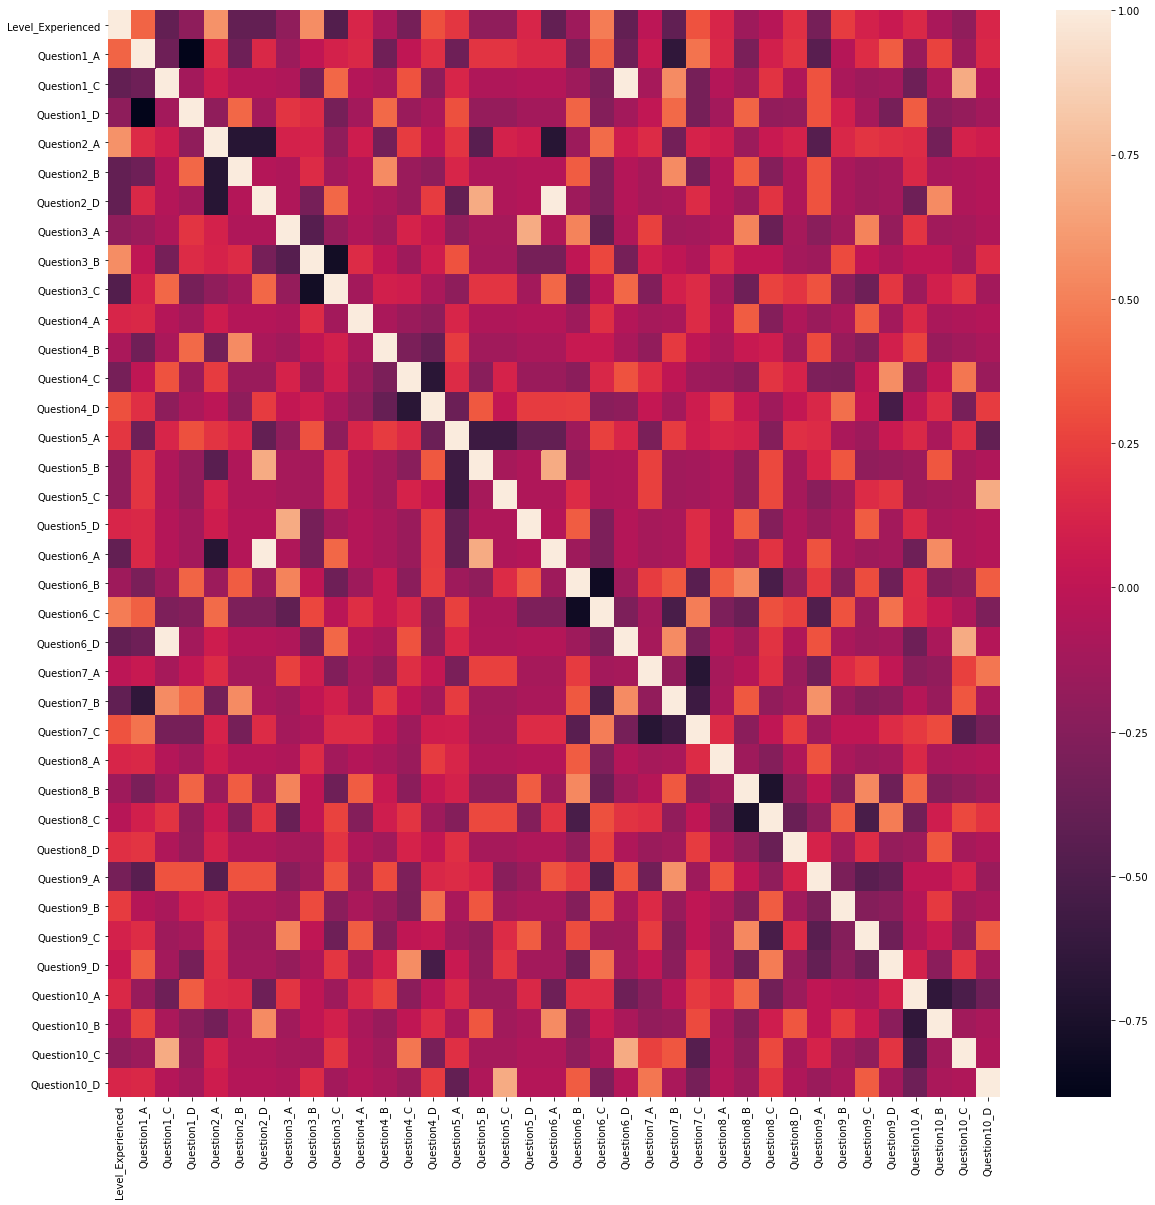

,Level_Experienced,Question1_A,Question1_C,Question1_D,Question2_A,Question2_B,Question2_D,Question3_A,Question3_B,Question3_C,...,Question8_C,Question8_D,Question9_A,Question9_B,Question9_C,Question9_D,Question10_A,Question10_B,Question10_C,Question10_D
Level_Experienced,1.000000,3.889087e-01,-0.400000,-0.212500,0.580381,-0.400000,-0.400000,-0.199506,5.533986e-01,-0.475000,...,-3.227486e-02,0.181369,-3.162278e-01,2.282177e-01,1.060660e-01,0.050000,1.414214e-01,-9.128709e-02,-0.199506,0.125000
Question1_A,0.388909,1.000000e+00,-0.353553,-0.883883,0.153897,-0.353553,0.141421,-0.153897,3.103168e-18,0.106066,...,9.128709e-02,0.205196,-4.472136e-01,-4.303315e-02,1.666667e-01,0.353553,-1.666667e-01,2.581989e-01,-0.153897,0.141421
Question1_C,-0.400000,-3.535534e-01,1.000000,-0.125000,0.072548,-0.050000,-0.050000,-0.072548,-3.162278e-01,0.400000,...,1.936492e-01,-0.072548,3.162278e-01,-9.128709e-02,-1.414214e-01,-0.125000,-3.535534e-01,-9.128709e-02,0.689202,-0.050000
Question1_D,-0.212500,-8.838835e-01,-0.125000,1.000000,-0.199506,0.400000,-0.125000,0.199506,1.581139e-01,-0.312500,...,-1.936492e-01,-0.181369,3.162278e-01,9.128709e-02,-1.060660e-01,-0.312500,3.535534e-01,-2.282177e-01,-0.181369,-0.125000
Question2_A,0.580381,1.538968e-01,0.072548,-0.199506,1.000000,-0.689202,-0.689202,0.105263,1.147079e-01,-0.199506,...,4.682929e-02,0.105263,-4.588315e-01,1.324532e-01,2.051957e-01,0.181369,1.538968e-01,-3.311331e-01,0.105263,0.072548
Question2_B,-0.400000,-3.535534e-01,-0.050000,0.400000,-0.689202,1.000000,-0.050000,-0.072548,1.581139e-01,-0.125000,...,-2.581989e-01,-0.072548,3.162278e-01,-9.128709e-02,-1.414214e-01,-0.125000,1.414214e-01,-9.128709e-02,-0.072548,-0.050000
Question2_D,-0.400000,1.414214e-01,-0.050000,-0.125000,-0.689202,-0.050000,1.000000,-0.072548,-3.162278e-01,0.400000,...,1.936492e-01,-0.072548,3.162278e-01,-9.128709e-02,-1.414214e-01,-0.125000,-3.535534e-01,5.477226e-01,-0.072548,-0.050000
Question3_A,-0.199506,-1.538968e-01,-0.072548,0.199506,0.105263,-0.072548,-0.072548,1.000000,-4.588315e-01,-0.181369,...,-3.746343e-01,-0.105263,-2.294157e-01,-1.324532e-01,5.129892e-01,-0.181369,2.051957e-01,-1.324532e-01,-0.105263,-0.072548
Question3_B,0.553399,3.103168e-18,-0.316228,0.158114,0.114708,0.158114,-0.316228,-0.458831,1.000000e+00,-0.790569,...,6.798700e-17,-0.114708,-1.428571e-01,2.886751e-01,4.965068e-17,-0.079057,-3.723801e-17,-4.006172e-18,-0.114708,0.158114
Question3_C,-0.475000,1.060660e-01,0.400000,-0.312500,-0.199506,-0.125000,0.400000,-0.181369,-7.905694e-01,1.000000,...,2.581989e-01,0.199506,3.162278e-01,-2.282177e-01,-3.535534e-01,0.212500,-1.414214e-01,9.128709e-02,0.199506,-0.125000


In [10]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr_final, xticklabels=corr_final.columns, yticklabels=corr_final.columns, ax=ax)
plt.show()
corr_final